# **Loading of libraries**

In [1]:
import nltk
import warnings
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 600)
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, SnowballStemmer
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import gensim
import random
import collections
import re
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from gensim import models, corpora, similarities
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "/content/drive/My Drive/Design Project"

/content/drive/My Drive/Design Project


In [4]:
## set path
train_data_path = 'proppy_1.0.train.tsv'
valid_data_path = 'proppy_1.0.dev.tsv'
test_data_path  = 'proppy_1.0.test.tsv'


## data column names/feature names
column_names = ['text', 'location', 'tone', 'date', 'ID', 'URL',
                'MBFC_factuality_label', 'URL.1',  'MBFC_factuality_label.1',
                'URL_to_MBFC_page', 'source_name', 'MBFC_notes_about_source',
                'MBFC_bias_label', 'source_URL', 'propaganda_label']

**Since the files are .tsv files i.e., tab separated files, I have put the separation as '\t' and all coulmn names are set as to names.**

In [5]:
## loading datasets
train_data = pd.read_csv(train_data_path, sep='\t', names = column_names)
print(f"Train Shape : {train_data.shape}")
valid_data = pd.read_csv('proppy_1.0.dev.tsv', sep='\t', names = column_names)
print(f"Valid Shape : {valid_data.shape}")
test_data  = pd.read_csv('proppy_1.0.test.tsv', sep='\t', names = column_names)
print(f"Test Shape : {valid_data.shape}")

Train Shape : (35986, 15)
Valid Shape : (5125, 15)
Test Shape : (5125, 15)


## **1.1 Basic info check**

In [6]:
train_data.sample(5) ## get sample rows

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
7367,"A SEVERE thunderstorm warning has been cancelled after storms rolled across parts of Queensland this afternoon, bringing damaging winds. It follows last night’s intense cell that brought more than 265,000 lightning strikes and left more than 100,000 properties without power. Fewer than 10,000 southeast Queensland properties were still affected by late Monday night, with Logan City accounting for nearly 7000 of them. The Bureau of Meteorology cancelled the latest warning at 5.15pm, saying severe thunderstorms were no longer affecting the southeast Queensland area. media_camera Severe thu...","Toowoomba, Queensland, Australia",-4.333333,2018-02-13,730424244,http://www.couriermail.com.au/news/queensland/weather/storm-warning-issued-for-parts-of-queensland/news-story/ee4de21334f17fdbb9fac142b592d76a?nk=d6be717831019705c6fea3e24dff99ed-1518504415,Jacob Miley,Queensland weather: Severe thunderstorms return,HIGH,http://mediabiasfactcheck.com/the-courier-mail/,The Courier Mail,NaN,rightcenter04,couriermail.com.au,-1
30371,"TAIPEI (Taiwan News)—Taiwan’s Ministry of Education (MOE) held a presentation on Monday to present new content of “Col English,” the free online English learning platform launched by the MOE to help elementary school and junior high school students in the country learn English in an easier and more interesting way. The Cool English online learning platform, which was designed and maintained by National Taiwan Normal University, launched four new courses--the Voice of America (VOA) movie English, filling in English song lyrics, English Village, and online grammatical error detection system...","Taipei, T'ai-pei, Taiwan",2.576112,2018-05-01,752331067,https://www.taiwannews.com.tw/en/news/3419210,Taiwan News,Taiwan’s free online English learning p...,unknown,unknown,taiwannews.com.tw,unknown,unknown,taiwannews.com.tw,-1
22101,"TOKYO: Japan Airlines (JAL) on Monday announced plans to launch a budget airline, hoping to take advantage of an expected expansion in the nation's low-cost market ahead of the 2020 Tokyo Olympics. JAL hopes to take advantage of Tokyo 2020 to boost its low-cost offering The new carrier would run medium-haul international services between Tokyo and major cities in Asia, the US and Europe from summer 2020, JAL said in a statement. The carrier, which will be named later, will become a subsidiary of JAL, the firm said, adding it may seek other investors to expand its business model. JAL ha...","Bangkok, Krung Thep Mahanakhon, Thailand",1.986755,2017-05-14,755699376,https://www.bangkokpost.com/business/world/1465018/jal-to-launch-low-cost-carrier-ahead-of-2020-tokyo-olympics,Bangkok Post Public Company Limited,JAL to launch low-cost carrier ahead of 2020 Tokyo Olympics | Bangkok Post: business,unknown,unknown,bangkokpost.com,unknown,unknown,bangkokpost.com,-1
27592,"Share: LAHORE - The provincial bigwigs have started discussions to devise a strategy to rationalise the difference in salaries drawn by regular officers and those hired by public sector companies. Earlier, top officials were busy resolving issues facing the public sector companies like completion of their record and audit. Even Additional Chief Secretary Umar Rasool was looking into companies’ issues after former LDA director general and Quaid-i-Azam Solar Park Company chief executive officer Ahad Cheema was arrested on corruption charges by the National Accountability Bureau (NAB). Che...","Lahore, Punjab, Pakistan",0.822368,2018-05-09,754284158,https://nation.com.pk/09-May-2018/plan-to-rationalise-pays-of-companies-ceos,Javed Iqbal,Plan to ‘rationalise’ pays of companies’ CEOs,unknown,unknown,nation.com.pk,unknown,unknown,nation.com.pk,-1
4495,"© Phil Lewis/WENN.com A Meghan Markle waxwork unveiled by Madame Tussauds went on display beside her future hus

In [7]:
train_data['text'].values[34355]

"Oh, Nancy.  The most disliked politician in America just can’t seem to help herself. California Democrat Nancy Pelosi was at it again, putting her foot in her mouth, and actually sounding like she was hoping to incite a rebellion.  Nancy’s concern centered around the government policy of separating children from their criminal parents when they’re detained illegally entering the country. Oddly, she’s never voiced any of these concerns in the past 20 years… which is how long the policy of not detaining children in a government facility has been going on.  take our poll - story continues below  Whom do you consider to be the most corrupt Democrat Politician? Whom do you consider to be the most corrupt Democrat Politician?  Whom do you consider to be the most corrupt Democrat Politician? * Dianne Feinstein Maxine Waters Adam Schiff Chuck Schumer Kamala Harris Kirsten Gillibrand Keith Ellison Cory Booker  Email *  Phone This field is for validation purposes and should be left unchanged. C

In [8]:
train_data['URL'].values[34355]

'https://freedomoutpost.com/is-pelosi-trying-to-incite-rebellion-on-the-immigration-issue/'

In [9]:
train_data.info() ## basic information about dataset - Here we can find the basics details about the data frame. So this a pandas data frame, total number of features/columns start from 0 to 35985
# i.e.,total of 15 coulmns. Null means no values present in that coulmn and non-null means values are present in that column(that means we have text data for all 35985 columns).
# Similarly if we look at Coulmn 6 - we have 26,902 values that means null values are present. Next data type is Object - meaning in pandas dataframe an object can be any data type
# i.e., mixture of strings, float, integer etc. ID dtype is integer & propaganda label is also integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35986 entries, 0 to 35985
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   text                     35986 non-null  object 
 1   location                 35986 non-null  object 
 2   tone                     35986 non-null  float64
 3   date                     35986 non-null  object 
 4   ID                       35986 non-null  int64  
 5   URL                      35986 non-null  object 
 6   MBFC_factuality_label    26902 non-null  object 
 7   URL.1                    35986 non-null  object 
 8   MBFC_factuality_label.1  35986 non-null  object 
 9   URL_to_MBFC_page         35986 non-null  object 
 10  source_name              35986 non-null  object 
 11  MBFC_notes_about_source  29979 non-null  object 
 12  MBFC_bias_label          35986 non-null  object 
 13  source_URL               35986 non-null  object 
 14  propaganda_label      

In [10]:
## check nullvalues present in the dataset- why do we do it ? - Checking for null values is an important step in data preprocessing for machine learning, and should be done before any other transformations
## or feature engineering. This ensures that the dataset is clean and consistent, and that the machine learning model can learn from the maximum amount of available data.
## checking for null values means ensuring that there are no missing or empty values in the dataset. In the context of text data, null values can occur if the text of a particular document or data point
## is missing or was not properly recorded. If null values are present in the dataset, they need to be handled in some way, either by filling them in with placeholder text or by removing the data points
## altogether.
train_data.isnull().sum()

text                          0
location                      0
tone                          0
date                          0
ID                            0
URL                           0
MBFC_factuality_label      9084
URL.1                         0
MBFC_factuality_label.1       0
URL_to_MBFC_page              0
source_name                   0
MBFC_notes_about_source    6007
MBFC_bias_label               0
source_URL                    0
propaganda_label              0
dtype: int64

In [11]:
## check for duplicate data. Here I am creating a varibale/list and selecting 2 coulmns - 'text & propaganda label' and storing it in that list/varibale by name ----> col_to_select and next am
## filtering the train data
col_to_select = ['text', 'propaganda_label']

## filtering the training data with selected columns
train_data = train_data[col_to_select]

## checking for duplicate rows
train_data[train_data.duplicated()]

,text,propaganda_label


**From the above, there are no rows present as duplicated in the dataset for mix of text and propaganda label**

In [12]:
train_data[train_data[['text']].duplicated()]   #### checking if there is any text present as duplicate

,text,propaganda_label


## **1.2 Target Label Analysis -**

**Target label analysis in machine learning (ML) refers to the process of analyzing the target variable, also known as the dependent variable or the outcome variable, that the model is trying to predict. The target variable is the variable that the model will learn to predict based on the other variables, called the features or independent variables**

Since my project is propaganda/fake news text classification and it's a binary classification dataset where (-1 : non-propaganda/original & 1 : propaganda), my target varibale/ dependent varibales in my dataset is propaganda label column

In [13]:
train_data['propaganda_label'].value_counts()

-1    31965
 1     4021
Name: propaganda_label, dtype: int64

-1    31965
 1     4021
Name: propaganda_label, dtype: int64


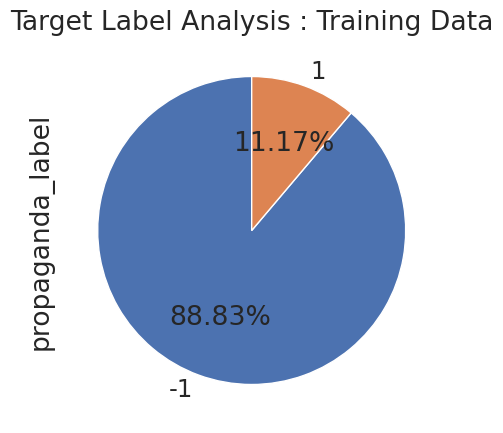

In [14]:
## get label class wise distribution for training dataset
label_distribution = train_data['propaganda_label'].value_counts()
print(label_distribution)

pie_plot = label_distribution.plot(kind = 'pie', autopct = '%.2f%%', figsize=(5,5), startangle = 90,
                                   title = 'Target Label Analysis : Training Data')

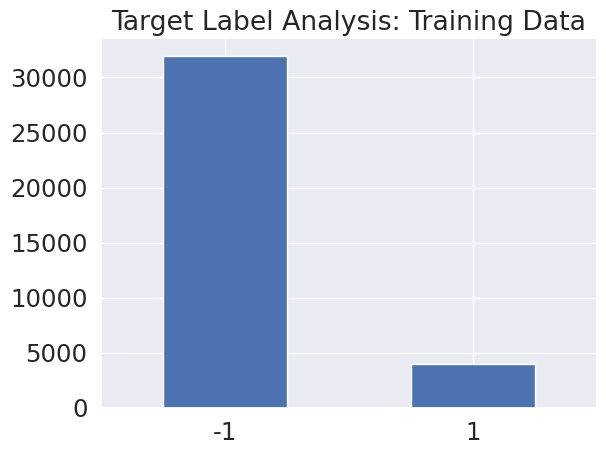

In [15]:
bar_plot = label_distribution.plot(kind='bar', rot = 0, title='Target Label Analysis: Training Data')

## **1.3 Text Pre-Processing -**

**Text preprocessing refers to the process of cleaning and transforming raw text data into a format suitable for analysis and modeling. It's a crucial step in natural language processing (NLP) and text mining tasks such as sentiment analysis, topic modeling, and language translation. Text preprocessing involves several steps, some of which are :**

**1. Text cleaning:** This involves removing unwanted characters, such as punctuation, numbers, and special symbols, from the text.

**2. Tokenization:** This involves breaking down the text into individual words or tokens.

**3. Stop word removal:** This involves removing common words such as "the," "and," and "or," which do not carry significant meaning.

**4. Stemming and Lemmatization:** These are techniques used to reduce words to their root forms to avoid redundancy in the data.

**5. Part-of-speech tagging:** This involves labeling each word with its part of speech, such as noun, verb, adjective, or adverb.

**6. Feature extraction:** This involves transforming the text into numerical features, such as bag-of-words, n-grams, or word embeddings, that can be used in machine learning models.

**Text preprocessing helps to improve the accuracy and efficiency of NLP and text mining tasks by reducing noise and redundancy in the data, making it easier for machine learning algorithms to extract meaningful patterns and insights.**

In [16]:
## checking for samples
train_data['text'].values[34355]

"Oh, Nancy.  The most disliked politician in America just can’t seem to help herself. California Democrat Nancy Pelosi was at it again, putting her foot in her mouth, and actually sounding like she was hoping to incite a rebellion.  Nancy’s concern centered around the government policy of separating children from their criminal parents when they’re detained illegally entering the country. Oddly, she’s never voiced any of these concerns in the past 20 years… which is how long the policy of not detaining children in a government facility has been going on.  take our poll - story continues below  Whom do you consider to be the most corrupt Democrat Politician? Whom do you consider to be the most corrupt Democrat Politician?  Whom do you consider to be the most corrupt Democrat Politician? * Dianne Feinstein Maxine Waters Adam Schiff Chuck Schumer Kamala Harris Kirsten Gillibrand Keith Ellison Cory Booker  Email *  Phone This field is for validation purposes and should be left unchanged. C

In [17]:
## length of the text
total_words_in_34355 = len(train_data['text'].values[34355].split())
print(total_words_in_34355)

1294


### **1.3 a. Lowercasing the Text**

In [18]:
## lowercase and check the sample --- Here am creating a new column named 'text_preprocessed' in the train_data DataFrame. It converts the text in the 'text' column to lowercase by
## using the .str.lower() method. Then it assigns the resulting text to the newly created 'text_preprocessed' column. The second line of the code is indexing the text_preprocessed column of the
## DataFrame to get the preprocessed text value for the 34355th row. Since .values returns a numpy array, this code will return the preprocessed text for the 34355th row in the train_data DataFrame.
train_data['text_preprocessed'] = train_data['text'].str.lower()

train_data['text_preprocessed'].values[34355]

"oh, nancy.  the most disliked politician in america just can’t seem to help herself. california democrat nancy pelosi was at it again, putting her foot in her mouth, and actually sounding like she was hoping to incite a rebellion.  nancy’s concern centered around the government policy of separating children from their criminal parents when they’re detained illegally entering the country. oddly, she’s never voiced any of these concerns in the past 20 years… which is how long the policy of not detaining children in a government facility has been going on.  take our poll - story continues below  whom do you consider to be the most corrupt democrat politician? whom do you consider to be the most corrupt democrat politician?  whom do you consider to be the most corrupt democrat politician? * dianne feinstein maxine waters adam schiff chuck schumer kamala harris kirsten gillibrand keith ellison cory booker  email *  phone this field is for validation purposes and should be left unchanged. c

### **1.3 b. Decontractions of Words**

In [19]:
## deconstructions of word means won't -> will not, can't -> can not, he's -> he is

train_data['text_preprocessed'] = train_data['text_preprocessed'].str.replace(r"won\'t", "will not")\
                                        .str.replace(r"can\'t", "can not")\
                                        .str.replace(r"n\'t", " not")\
                                        .str.replace(r"\'re", " are")\
                                        .str.replace("\’s", " is")\
                                        .str.replace(r"\'d", " would")\
                                        .str.replace(r"\'ll", " will")\
                                        .str.replace(r"\'t", " not")\
                                        .str.replace(r"\'ve", " have")\
                                        .str.replace(r"\'m", " am")\
                                        .str.replace("\'s", " is")

train_data['text_preprocessed'].values[34355]

'oh, nancy.  the most disliked politician in america just can’t seem to help herself. california democrat nancy pelosi was at it again, putting her foot in her mouth, and actually sounding like she was hoping to incite a rebellion.  nancy is concern centered around the government policy of separating children from their criminal parents when they’re detained illegally entering the country. oddly, she is never voiced any of these concerns in the past 20 years… which is how long the policy of not detaining children in a government facility has been going on.  take our poll - story continues below  whom do you consider to be the most corrupt democrat politician? whom do you consider to be the most corrupt democrat politician?  whom do you consider to be the most corrupt democrat politician? * dianne feinstein maxine waters adam schiff chuck schumer kamala harris kirsten gillibrand keith ellison cory booker  email *  phone this field is for validation purposes and should be left unchanged.

### **1.3 c. Removal of Special Characters and Punctuations**

In [20]:
## removal of all special characters and punctuation
train_data['text_preprocessed'] = train_data['text_preprocessed'].str.replace(r'-', ' ')\
                                                .str.replace(r'[^\w\s]', '')

train_data['text_preprocessed'].values[34355]

'oh nancy  the most disliked politician in america just cant seem to help herself california democrat nancy pelosi was at it again putting her foot in her mouth and actually sounding like she was hoping to incite a rebellion  nancy is concern centered around the government policy of separating children from their criminal parents when theyre detained illegally entering the country oddly she is never voiced any of these concerns in the past 20 years which is how long the policy of not detaining children in a government facility has been going on  take our poll   story continues below  whom do you consider to be the most corrupt democrat politician whom do you consider to be the most corrupt democrat politician  whom do you consider to be the most corrupt democrat politician  dianne feinstein maxine waters adam schiff chuck schumer kamala harris kirsten gillibrand keith ellison cory booker  email   phone this field is for validation purposes and should be left unchanged completing this p

### **1.3 d. Remove Numbers and Digit & Stopwords**

In [21]:
## remove all numbers and digits present if any
train_data['text_preprocessed'] = train_data['text_preprocessed'].apply(lambda x : ' '.join([i for i in x.split()
                                                                     if not i.isdigit()]))

train_data['text_preprocessed'].values[34355]

'oh nancy the most disliked politician in america just cant seem to help herself california democrat nancy pelosi was at it again putting her foot in her mouth and actually sounding like she was hoping to incite a rebellion nancy is concern centered around the government policy of separating children from their criminal parents when theyre detained illegally entering the country oddly she is never voiced any of these concerns in the past years which is how long the policy of not detaining children in a government facility has been going on take our poll story continues below whom do you consider to be the most corrupt democrat politician whom do you consider to be the most corrupt democrat politician whom do you consider to be the most corrupt democrat politician dianne feinstein maxine waters adam schiff chuck schumer kamala harris kirsten gillibrand keith ellison cory booker email phone this field is for validation purposes and should be left unchanged completing this poll grants you

In [22]:
## remove all possible stopwords to reduce the word count present in the dataset
## and make it more relevant ------ Removing frequently occurring words such as "the," "and," etc., as they don't carry much meaning.


stopword_list = sorted(stopwords.words("english"))


train_data["text_preprocessed"] = train_data["text_preprocessed"].apply(lambda x : ' '.join(e for e in x.split()
                                                                     if e not in stopword_list))

train_data['text_preprocessed'].values[34355]

'oh nancy disliked politician america cant seem help california democrat nancy pelosi putting foot mouth actually sounding like hoping incite rebellion nancy concern centered around government policy separating children criminal parents theyre detained illegally entering country oddly never voiced concerns past years long policy detaining children government facility going take poll story continues consider corrupt democrat politician consider corrupt democrat politician consider corrupt democrat politician dianne feinstein maxine waters adam schiff chuck schumer kamala harris kirsten gillibrand keith ellison cory booker email phone field validation purposes left unchanged completing poll grants access freedom outpost updates free charge may opt anytime also agree site privacy policy terms use thing last weeks since picture kids cages actually obama era democrats complaining government separating children families theyre caught entering country illegally however doesnt really tell whol

### **1.3 e. Lemmatization**

In [23]:
## applying lemmatization
wnl = WordNetLemmatizer() ## store WordNetLemmatizer object to a variable called wnl

train_data["text_preprocessed"] = train_data["text_preprocessed"].apply(lambda x : " ".join(wnl.lemmatize(word)
                                                                        for word in x.split()))

train_data['text_preprocessed'].values[34355]

'oh nancy disliked politician america cant seem help california democrat nancy pelosi putting foot mouth actually sounding like hoping incite rebellion nancy concern centered around government policy separating child criminal parent theyre detained illegally entering country oddly never voiced concern past year long policy detaining child government facility going take poll story continues consider corrupt democrat politician consider corrupt democrat politician consider corrupt democrat politician dianne feinstein maxine water adam schiff chuck schumer kamala harris kirsten gillibrand keith ellison cory booker email phone field validation purpose left unchanged completing poll grant access freedom outpost update free charge may opt anytime also agree site privacy policy term use thing last week since picture kid cage actually obama era democrat complaining government separating child family theyre caught entering country illegally however doesnt really tell whole story government allo

**Text Preprocessing Implementing as a Function**

In [24]:
def final_preprocessing(data, stopword_list, lemma_object):
    """This function will do final preprocessing on the given texts.
    """
    preprocessed_text_list = []

    for sentence in data.values:

        sentence = sentence.lower()

        sentence = sentence.replace(r"won\'t", "will not").replace(r"can\'t", "can not")\
                           .replace(r"n\'t", " not").replace(r"\'re", " are")\
                           .replace("\’s", " is").replace(r"\'d", " would")\
                           .replace(r"\'ll", " will").replace(r"\'t", " not")\
                           .replace(r"\'ve", " have").replace(r"\'m", " am")\
                           .replace("\'s", " is")

        sentence = sentence.replace('-', ' ').replace('[^\w\s]', '')

        sentence = ' '.join([i for i in sentence.split() if not i.isdigit()])

        sentence = ' '.join(e for e in sentence.split() if e not in stopword_list)

        sentence = " ".join(lemma_object.lemmatize(word) for word in sentence.split())

        preprocessed_text_list.append(sentence)

    return preprocessed_text_list

**Applying the above function to validation dataset and test dataset**

In [25]:
## get validation preprocessed output and map to original dataset
valid_preprocessed_list = final_preprocessing(valid_data["text"], stopword_list, wnl)
valid_data['text_preprocessed'] = valid_preprocessed_list

## get test preprocessed output and map to original dataset
test_preprocessed_list = final_preprocessing(test_data["text"], stopword_list, wnl)
test_data['text_preprocessed'] = test_preprocessed_list

In [26]:
valid_data

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label,text_preprocessed
0,"Convened to examine the causes of civil unrest in black communities, the presidential commission issued a 1968 report with a stark conclusion: America was moving towards two societies, ""one black, one white — separate and unequal."" Fifty years after the historic Kerner Commission identified ""white racism"" as the key cause of ""pervasive discrimination in employment, education and housing,"" there has been no progress in how African-Americans fare in comparison to whites when it comes to homeownership, unemployment and incarceration, according to a report by the Economic Policy Institute rel...","Chicago, Illinois, United States",-4.593640,2018-02-27,734202079,http://www.courant.com/nation-world/ct-no-progress-african-americans-20180226-story.html,Tracy Jan,"Report: No progress for African-Americans on homeownership, unemployment and incarceration in 50 years",HIGH,http://mediabiasfactcheck.com/the-hartford-courant/,The Hartford Courant,"The Hartford Courant is the largest daily newspaper in the U.S. state of Connecticut, and is often recognized as the oldest continuously published newspaper in the United States. the Hartford Courant offers factual reporting and a left-center editorial stance. (7/30/2016)",leftcenter06,courant.com,-1,"convened examine cause civil unrest black communities, presidential commission issued report stark conclusion: america moving towards two societies, ""one black, one white — separate unequal."" fifty year historic kerner commission identified ""white racism"" key cause ""pervasive discrimination employment, education housing,"" progress african american fare comparison white come homeownership, unemployment incarceration, according report economic policy institute released monday. cases, african american worse today civil right movement culminated law barring housing voter discrimination well ra..."
1,"Discriminating against someone on the basis of sexual orientation is prohibited under federal civil rights law, a federal appeals court ruled Monday as it sided with a gay skydiving instructor who was fired from his job after discussing his sexuality with a client. The decision from the U.S. Court of Appeals for the 2nd Circuit offers expanded protections for LGBT people and marks a significant loss for President Donald Trump's Justice Department, which had filed a brief arguing Title VII of the Civil Rights Act of 1964 did not cover sexual orientation discrimination. But the state of th...","Chicago, Illinois, United States",-1.566952,2018-02-27,734203497,http://www.courant.com/nation-world/ct-anti-discrimination-law-sexual-orientation-20180226-story.html,Matt Zapotosky,"Employers can't discriminate based on sexual orientation, court says",HIGH,http://mediabiasfactcheck.com/the-hartford-courant/,The Hartford Courant,"The Hartford Courant is the largest daily newspaper in the U.S. state of Connecticut, and is often recognized as the oldest continuously published newspaper in the United States. the Hartford Courant offers factual reporting and a left-center editorial stance. (7/30/2016)",leftcenter06,courant.com,-1,"discriminating someone basis sexual orientation prohibited federal civil right law, federal appeal court ruled monday sided gay skydiving instructor fired job discussing sexuality client. decision u.s. court appeal 2nd circuit offer expanded protection lgbt people mark significant loss president donald trump justice department, filed brief arguing title vii civil right act cover sexual orientation discrimination. state law still murky, federal circuit part country issued mixed opinions. ruling 2nd circuit, based manhattan, could appealed supreme court. justice department spokesman devin o'..."
2,"Bill Cosby's 44-year-old daughter, Ensa Cosby, died in Massachusetts from kidney disease, a

## **1.4 WordCloud Analysis**

**Word cloud analysis is a visualization technique used to represent text data in a way that highlights the most frequently occurring words or phrases. It is a popular technique in natural language processing (NLP) and text analysis for quickly summarizing and identifying key themes or topics in a large volume of text.**

In [28]:
###This code is joining all the words present in the text_list into a single string all_present_words separated by a space character.
## The text_list is a list of strings, where each string represents a preprocessed text document. The for loop iterates over each string in the list, splits it into words using
## the split() method, and then adds all the resulting words to the all_present_words string.The resulting string all_present_words will contain all the words present in the preprocessed text documents,
## separated by space characters. This string can then be used for further analysis or visualization, such as creating a word cloud or calculating the frequency of each word in the text.


def word_cloud_plot(text_list, stopword_list):
    """
    This function creates the word cloud by taking all words into consideration.
    """
    ## get all words
    all_present_words = ' '.join(word for line in text_list
                                 for word in line.split())

    ## word cloud plotting
    word_cloud_list = WordCloud(width = 800, height = 800,
                                stopwords = set(stopword_list),
                                min_font_size = 15,
                                background_color = "black")\
                                .generate(all_present_words)
    #display image
    plt.figure(figsize=(15,10))
    plt.imshow(word_cloud_list, interpolation='bilinear')
    plt.axis("off")
    plt.show()

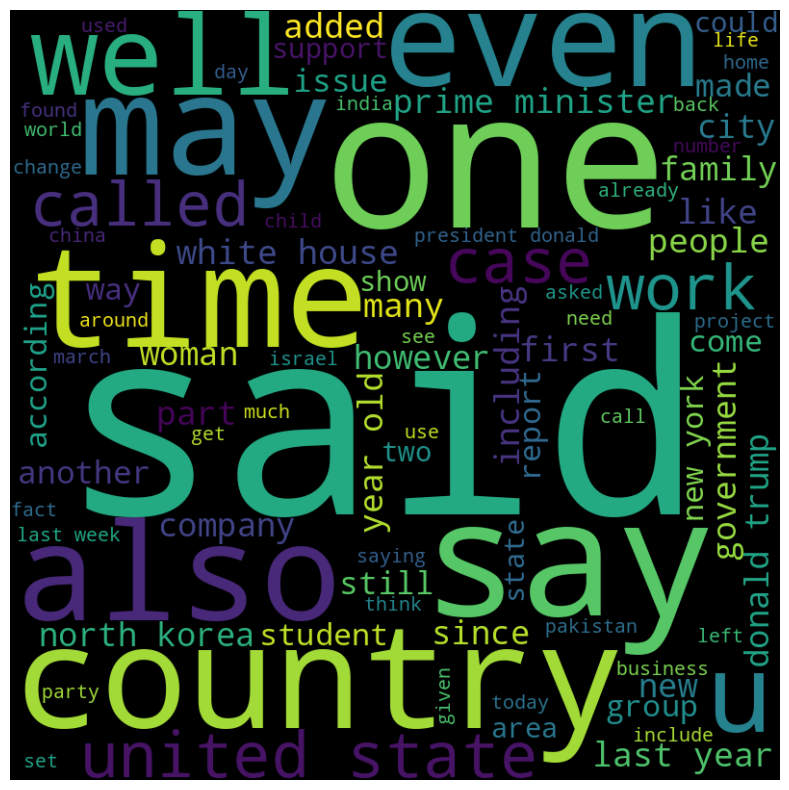

In [29]:
# non propaganda text
word_cloud_plot(train_data[train_data['propaganda_label'] == -1]["text_preprocessed"], stopword_list)

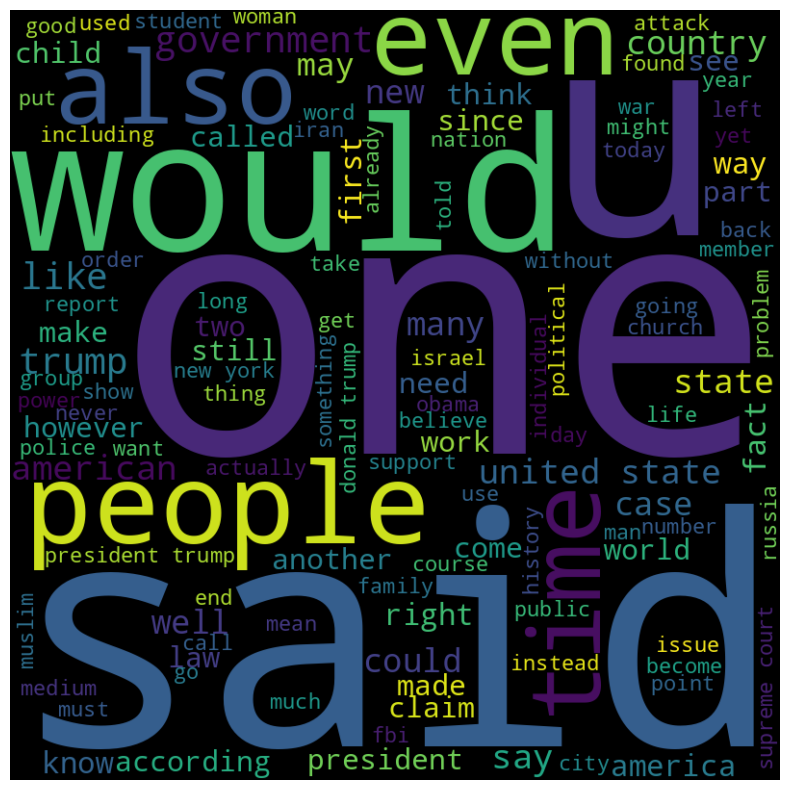

In [30]:
# propaganda text
word_cloud_plot(train_data[train_data['propaganda_label'] == 1]["text_preprocessed"], stopword_list)

## **1.5 N-Gram Analysis**

**N-gram analysis is a natural language processing (NLP) technique that involves counting the frequency of occurrence of sequences of n words in a text corpus. An n-gram is a contiguous sequence of n items, which in the case of text analysis, refers to n consecutive words.**

**For example, in the sentence "The quick brown fox jumps over the lazy dog," the 2-grams (also known as bigrams) would be "The quick", "quick brown", "brown fox", "fox jumps", "jumps over", "over the", "the lazy", and "lazy dog". Similarly, the 3-grams (also known as trigrams) would be "The quick brown", "quick brown fox", "brown fox jumps", "fox jumps over", "jumps over the", "over the lazy", and "the lazy dog".**

**N-gram analysis is often used in applications such as language modeling, text classification, and sentiment analysis. By analyzing the frequency of occurrence of n-grams in a corpus, it is possible to identify common patterns and relationships between words. For example, in a sentiment analysis task, certain 2-grams or 3-grams may be indicative of positive or negative sentiment.**

**N-gram analysis can be performed using various tools and libraries in programming languages such as Python and R. It is a powerful technique for extracting meaningful insights from text data and can be particularly useful when dealing with large and complex datasets.**

In [31]:
#Source: - https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc

"""function to generate ngrams and plot the data"""
def generate_ngrams(text, n_gram):
    #generating token
    word = [token for token in str(text).lower().split(" ") if token != ""]
    #generating ngrams
    ngrams = zip(*[word[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]



def freq_ngrams(text, n_gram, range, title):
    """parameters : text, number of ngrams(1,2,3), range(top ngrams)
       return : plot of word vs no of occurance
    """
    freq_dict = defaultdict(int)
    for sent in text:
        for w in generate_ngrams(sent,n_gram):
            freq_dict[w] += 1
    freq_dict = dict(freq_dict)
    #sorting dict to descending order
    qstn_txt = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
    qstn_txt.columns = ["word", "wordcount"]
    fig = plt.figure(figsize = (20,5))
    plt.bar(qstn_txt.word[0:range], qstn_txt.wordcount[0:range])
    plt.xticks(rotation = 90)
    plt.xlabel("words", fontsize=15)
    plt.xlabel("count", fontsize=15)
    plt.title(title, fontsize=20)
    return plt.show()

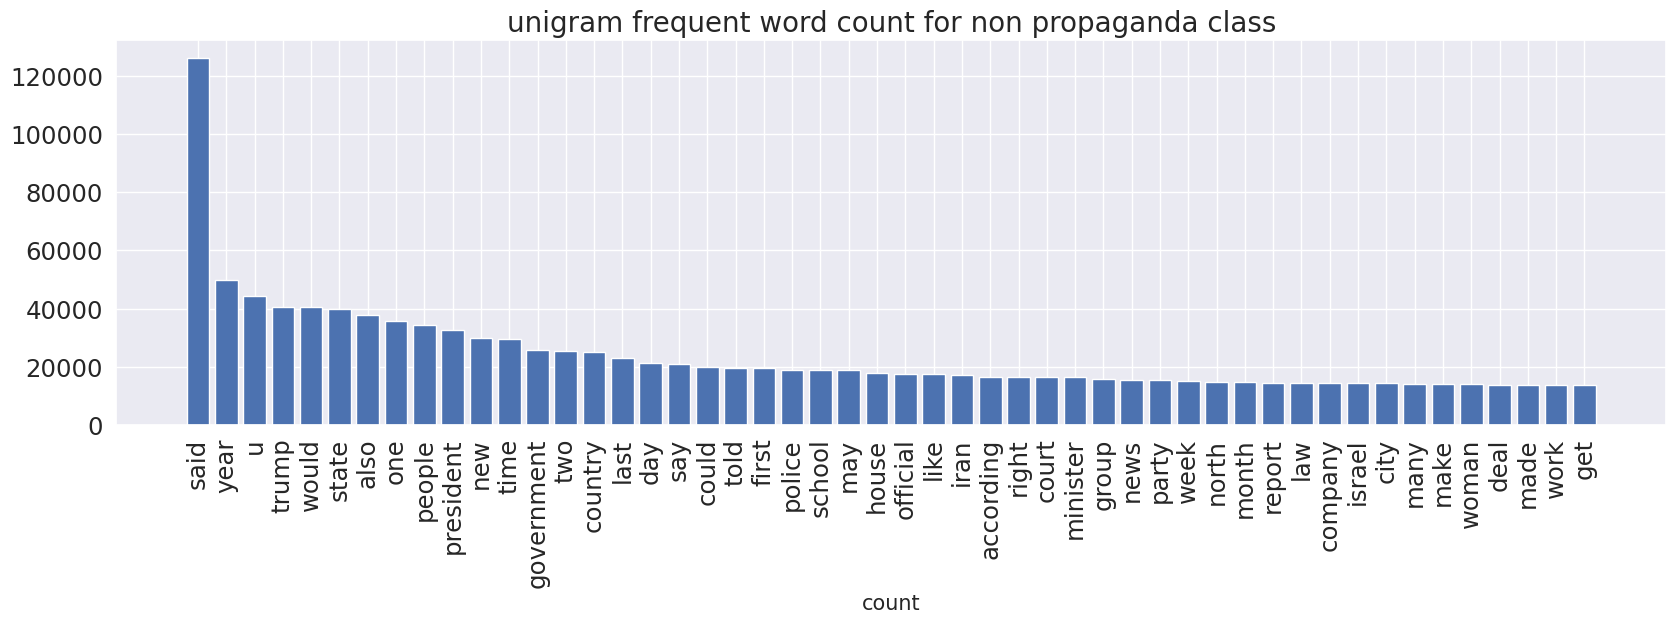

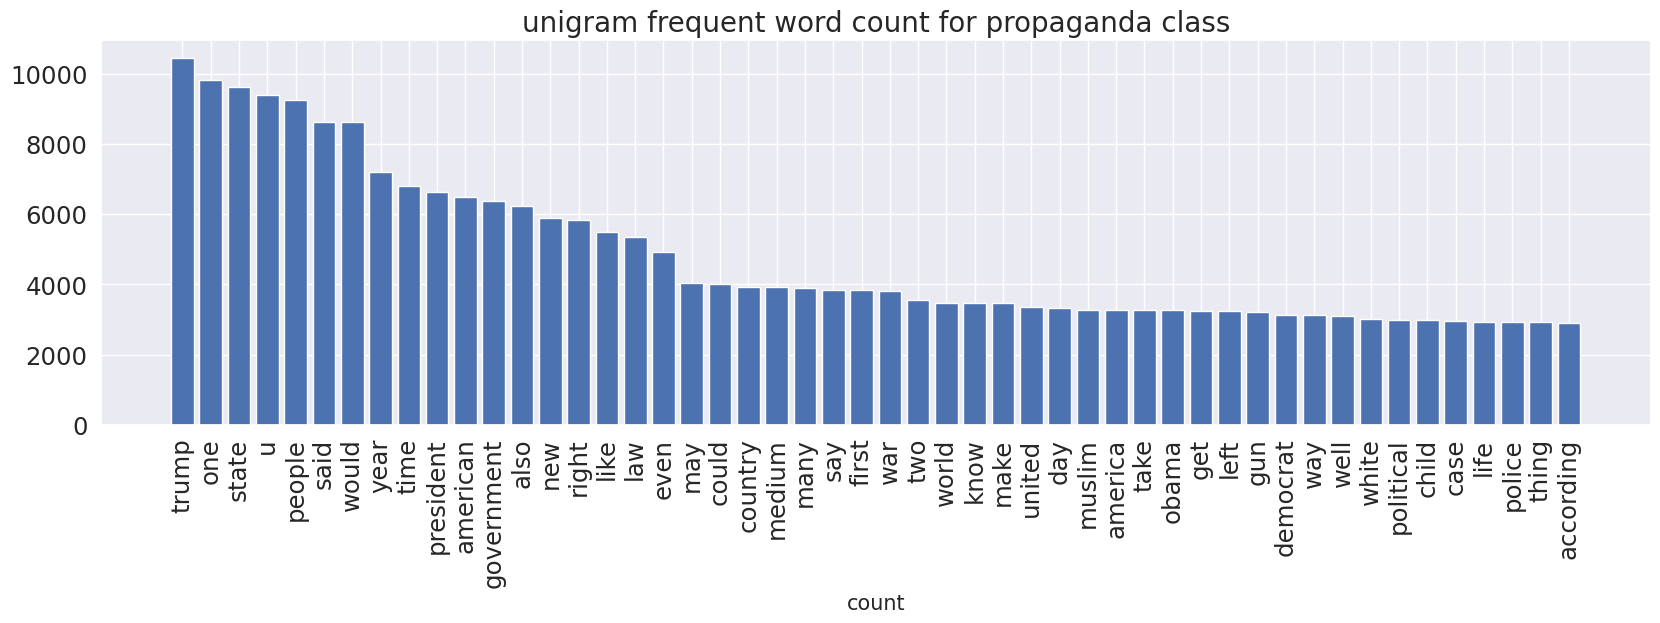

In [32]:
freq_ngrams(train_data[train_data['propaganda_label'] == -1]["text_preprocessed"], n_gram=1, range=50,
            title="unigram frequent word count for non propaganda class")

freq_ngrams(train_data[train_data['propaganda_label'] == 1]["text_preprocessed"], n_gram=1, range=50,
            title="unigram frequent word count for propaganda class")

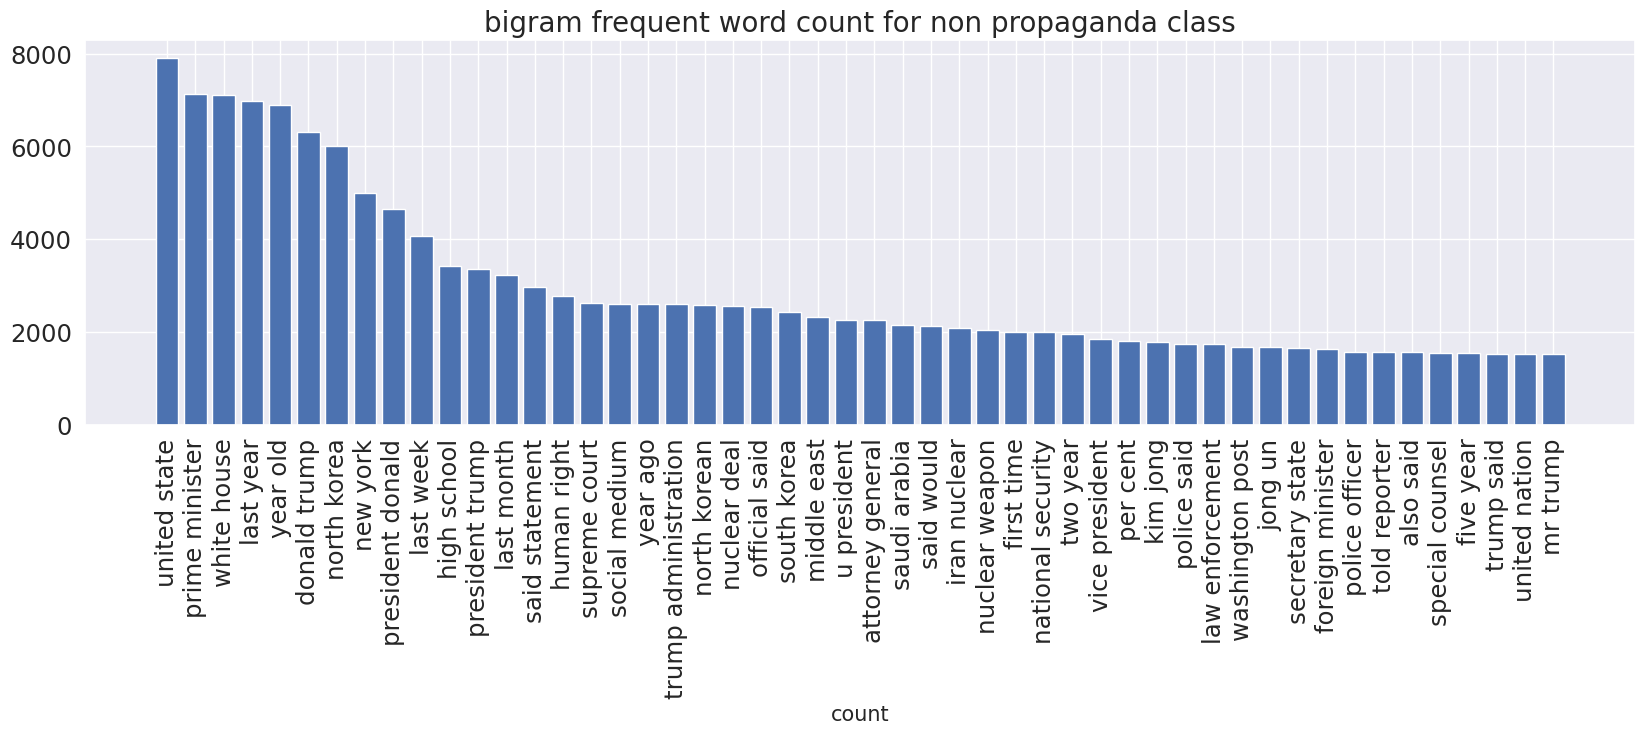

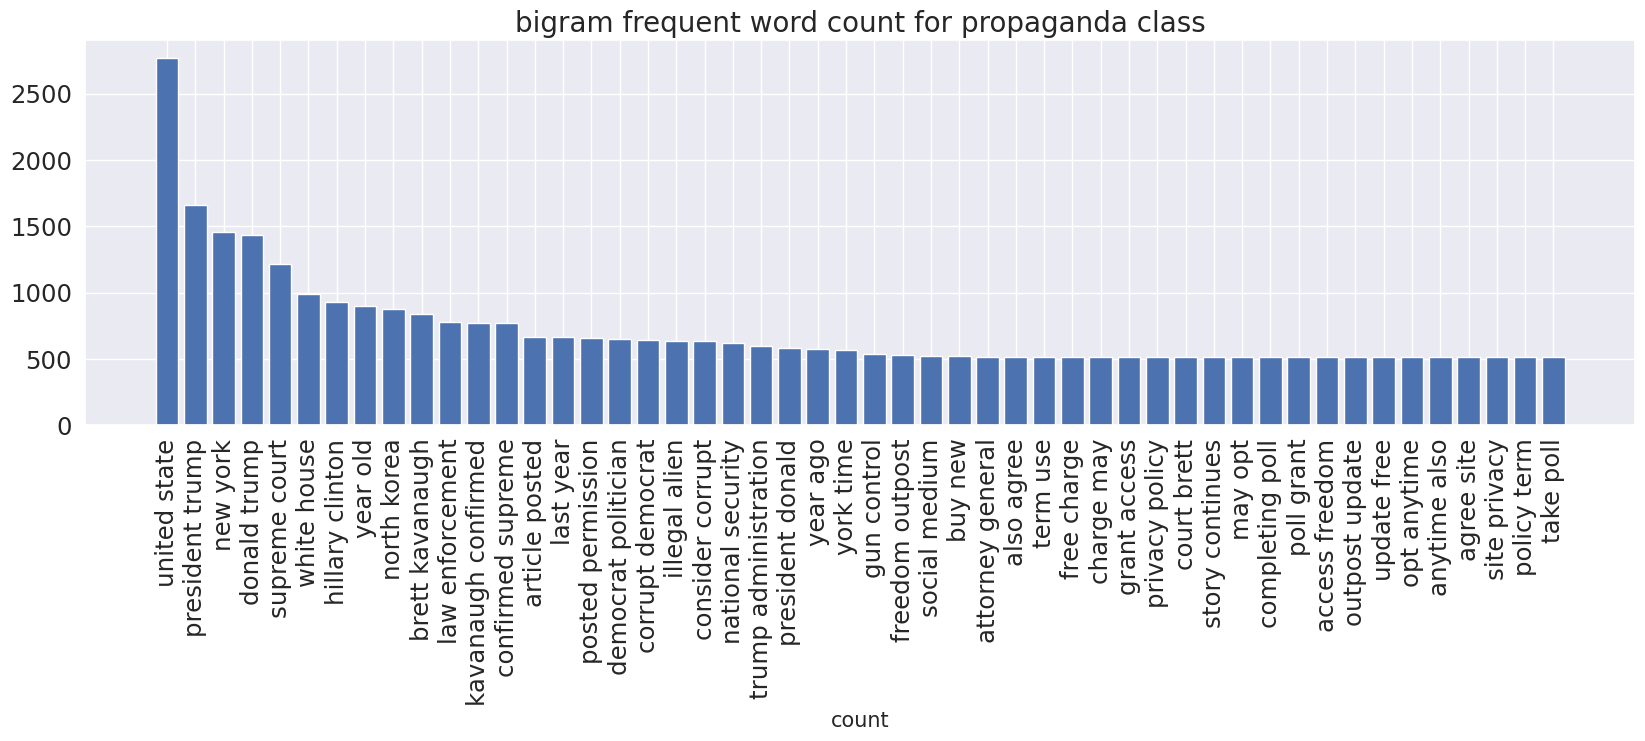

In [33]:
freq_ngrams(train_data[train_data['propaganda_label'] == -1]["text_preprocessed"], n_gram=2, range=50,
            title="bigram frequent word count for non propaganda class")

freq_ngrams(train_data[train_data['propaganda_label'] == 1]["text_preprocessed"], n_gram=2, range=50,
            title="bigram frequent word count for propaganda class")

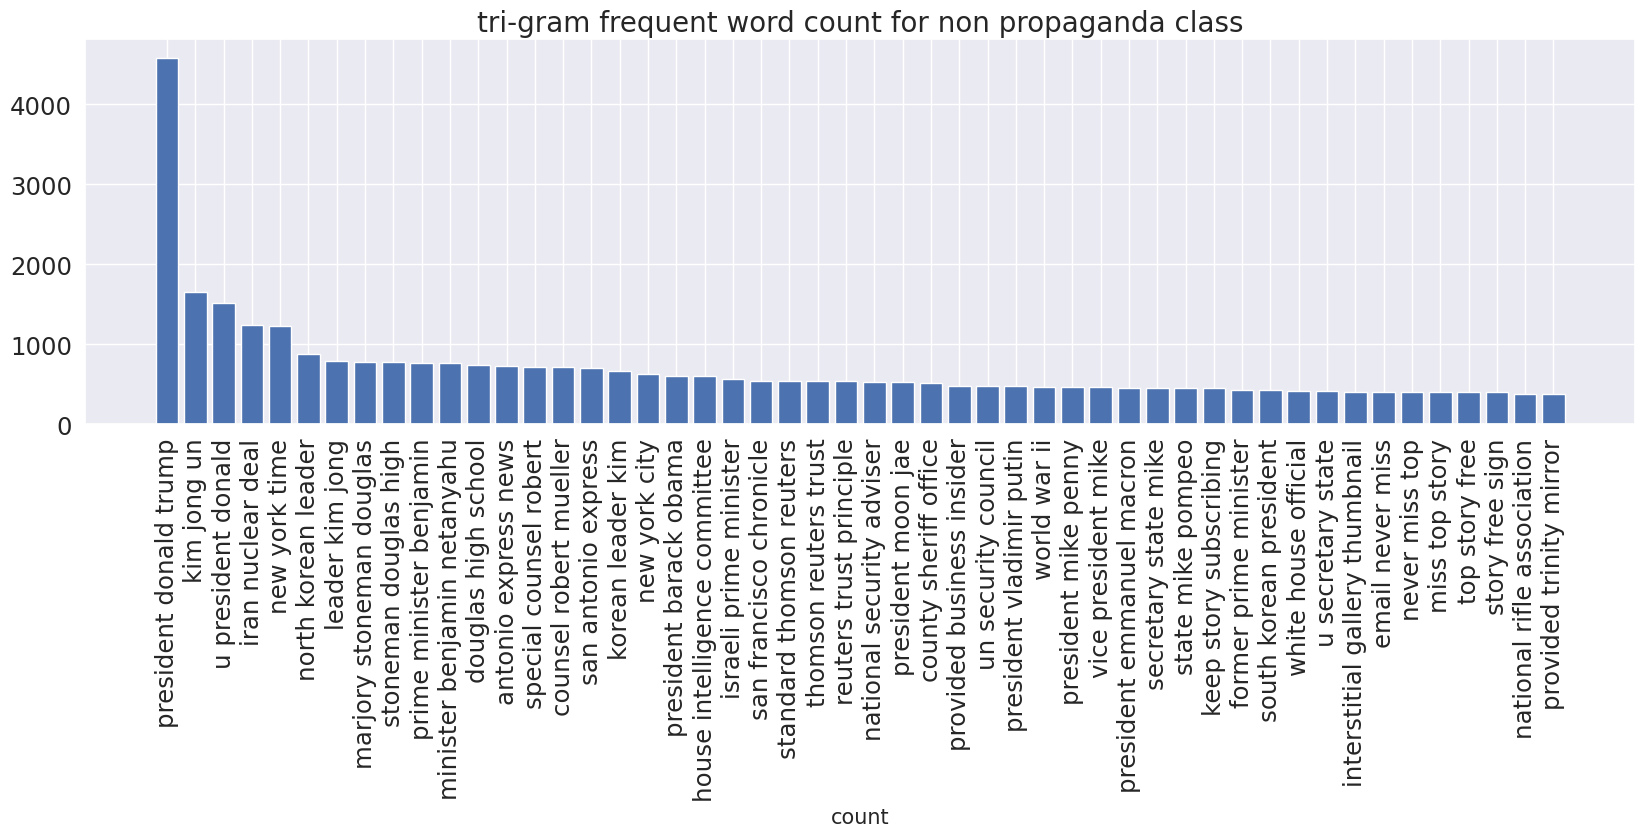

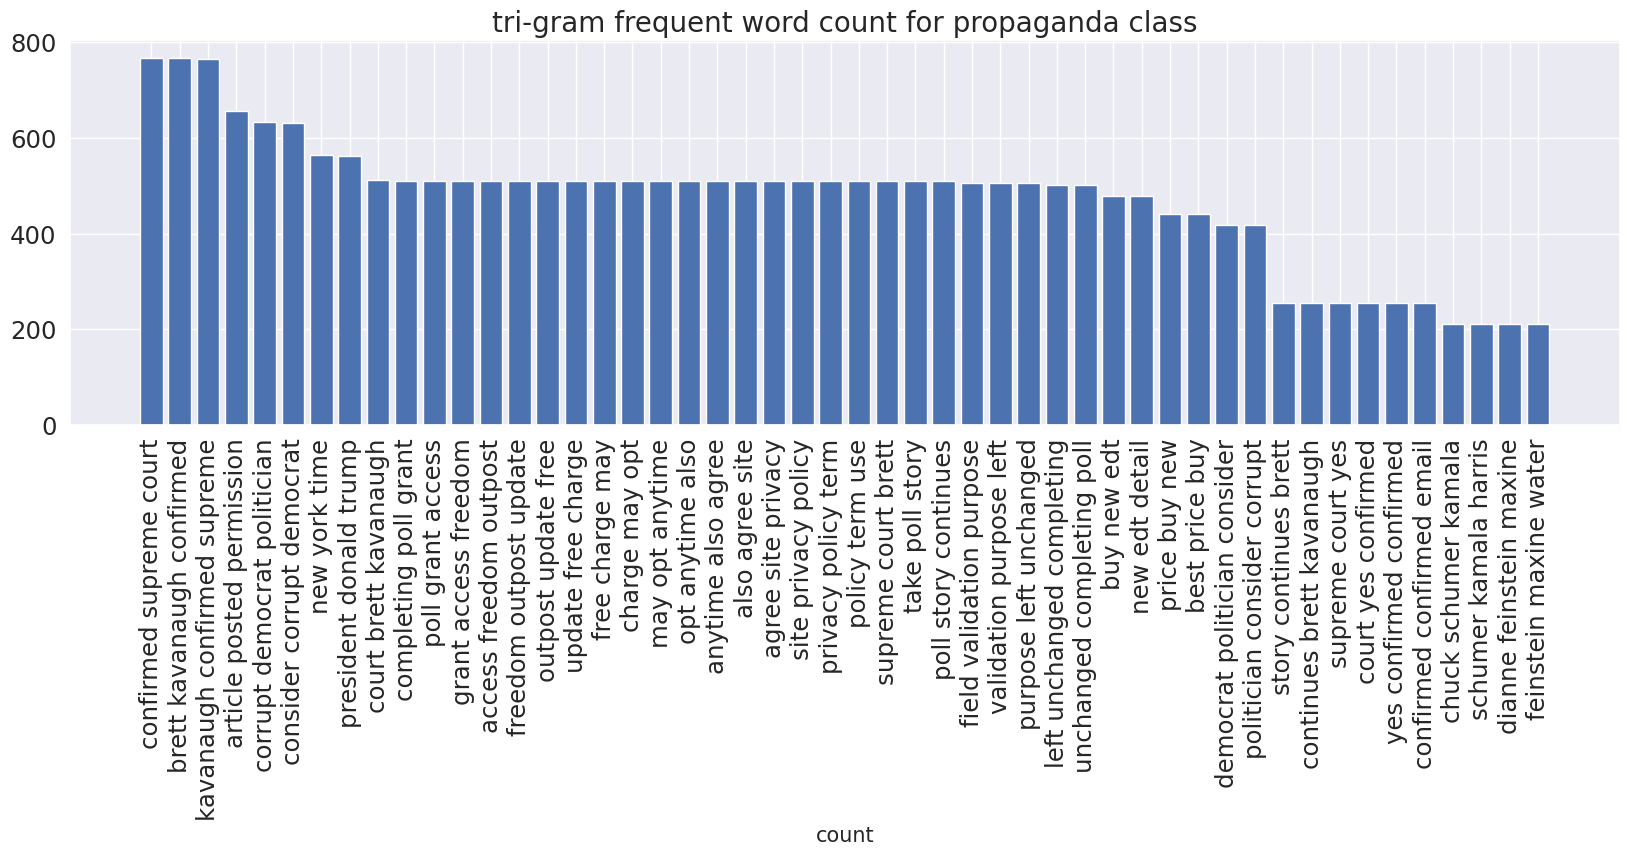

In [34]:
freq_ngrams(train_data[train_data['propaganda_label'] == -1]["text_preprocessed"], n_gram=3, range=50,
            title="tri-gram frequent word count for non propaganda class")

freq_ngrams(train_data[train_data['propaganda_label'] == 1]["text_preprocessed"], n_gram=3, range=50,
            title="tri-gram frequent word count for propaganda class")

In [ ]:
# Saving the preprocessed text data

train_prepro_df = pd.DataFrame(train_data, columns=['text_preprocessed','propaganda_label'])

train_prepro_df.to_csv('preprocessed_train_data.csv', index=False)

valid_prepro_df = pd.DataFrame(valid_data, columns=['text_preprocessed','propaganda_label'])

valid_prepro_df.to_csv('preprocessed_valid_data.csv', index=False)

test_prepro_df = pd.DataFrame(test_data, columns=['text_preprocessed','propaganda_label'])

test_prepro_df.to_csv('preprocessed_test_data.csv', index=False)